# MSBA410: Direct Mail Prospect Scoring Exercise

006309837

In [1]:
import numpy as np
import pandas as pd

holdout  = pd.read_excel('prospectscoringhw.xlsx', sheet_name = 'Holdout_data')
estimation  = pd.read_excel('prospectscoringhw.xlsx', sheet_name = 'Estimation_data')

**1. Run a logistic regression on the estimation list of 200 persons predicting y as a function of gender and the seven hotline variables and the intercept (constant) term. Do not elim- inate coefficients which appear statistically insignificant. Hand-in: The score equation for t from the logistic regression.**

In [2]:
import statsmodels.formula.api as smf

In [3]:
logistic_reg = smf.logit(formula='y ~ Gender+foodwebsites+travelwebsites+restaurantexp+travelexp+entertainmentexp+incm+ethnicdivneigh', data=estimation)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.579248
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 May 2024   Pseudo R-squ.:                  0.1135
Time:                        03:18:47   Log-Likelihood:                -115.85
converged:                       True   LL-Null:                       -130.68
Covariance Type:            nonrobust   LLR p-value:                 0.0002419
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -10.3659      2.477     -4.185      0.000     -15.220      -5.511
Gender     

**2. Evaluate the score function for each person in the holdout list of 300 persons. Based on this, compute the following for each person:**

**(1) the predicted response probability r**

In [4]:
x_test = holdout.drop(['y'], axis = 1)

holdout['predicted_response_prob'] = result.predict(x_test)
holdout['predicted_response_prob']

0      0.525970
1      0.554112
2      0.320354
3      0.723885
4      0.268740
         ...   
295    0.251233
296    0.073607
297    0.723784
298    0.272157
299    0.361369
Name: predicted_response_prob, Length: 300, dtype: float64

**(2) the consequent lift, which is obtained by dividing the predicted response probability by the average response rate in the estimation list. No Hand-in.**

In [5]:
average_response_rate = holdout['y'].mean()
holdout['lift'] = holdout['predicted_response_prob'] / average_response_rate
holdout['lift'] 

0      1.577909
1      1.662337
2      0.961063
3      2.171655
4      0.806219
         ...   
295    0.753700
296    0.220822
297    2.171353
298    0.816472
299    1.084107
Name: lift, Length: 300, dtype: float64

**3. Sort all the 300 persons in the holdout list in decreasing order of lift as is done in slide 30. No Hand-in.**

In [6]:
sorted_holdout = holdout.sort_values(by = 'lift', ascending = False)
sorted_holdout

,Gender,foodwebsites,travelwebsites,restaurantexp,travelexp,entertainmentexp,incm,ethnicdivneigh,y,predicted_response_prob,lift
131,1,317,57,70,63,12,26,0,1,0.750384,2.251151
243,0,321,57,70,63,0,28,0,0,0.743278,2.229834
191,0,315,57,70,63,0,0,14,1,0.739021,2.217063
159,0,311,57,70,63,0,0,0,1,0.736668,2.210003
19,1,314,57,70,63,0,0,0,1,0.730938,2.192814
...,...,...,...,...,...,...,...,...,...,...,...
211,0,406,39,0,63,0,26,0,0,0.016224,0.048673
152,0,291,39,10,52,0,0,28,0,0.011335,0.034006
96,0,159,57,15,41,0,26,0,0,0.011060,0.033179
285,1,354,30,10,52,0,0,0,0,0.010868,0.032603


**4. Plot the curve for marginal response rate vs number of solicitations made, like in the chart that appears on slide 31. The “marginal response rate” of the person at rank n is the nth-highest predicted response probability r. The plot should have the rank on the horizontal axis and the corresponding r on the vertical axis. Hand-in: the chart.**

In [7]:
import matplotlib.pyplot as plt

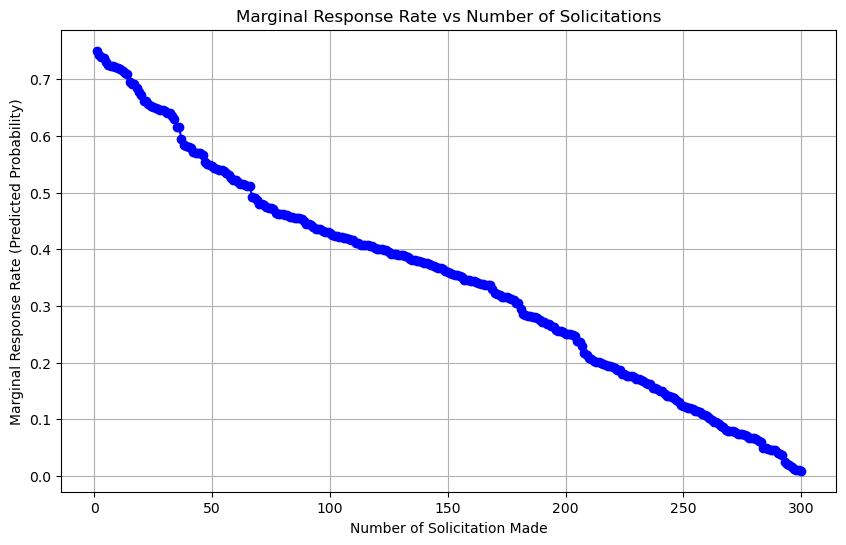

In [8]:
sorted_holdout.reset_index(inplace = True)
sorted_holdout['rank'] = sorted_holdout.index + 1


plt.figure(figsize=(10, 6))
plt.plot(sorted_holdout['rank'], sorted_holdout['predicted_response_prob'], marker='o', linestyle='-', color='b')
plt.title('Marginal Response Rate vs Number of Solicitations')
plt.xlabel('Number of Solicitation Made')
plt.ylabel('Marginal Response Rate (Predicted Probability)')
plt.grid(True)
plt.show()

**5. Suppose average LT Customer equity is 30, and the solicitation cost is $12. Use the marginal cost rule to calculate how many of the best prospects in the holdout list Melrose should contact. Hand-in: your calculations and final answer.**

In [9]:
LTV = 30
cost = 12

In [10]:
contact = sorted_holdout[sorted_holdout['predicted_response_prob'] > (cost/LTV) ]
len(contact)

121

**6. Compute the cumulative sum (aka running sum) of the predicted response probability r when the persons are sorted as in Question 3. This cumulative sum at rank n gives the expected number of conversions or positive responses if the firm were to contact the n customers with the highest r. Plot the curve of the expected number of positive responses vs number of solicitations made, like in the chart that appears on slide 33. You will notice that the curve does not rise as fast as one would expect from the usual 80/20 rule. Explain why the curve might be of this shape here. Hand-in: the chart and your explanation.**

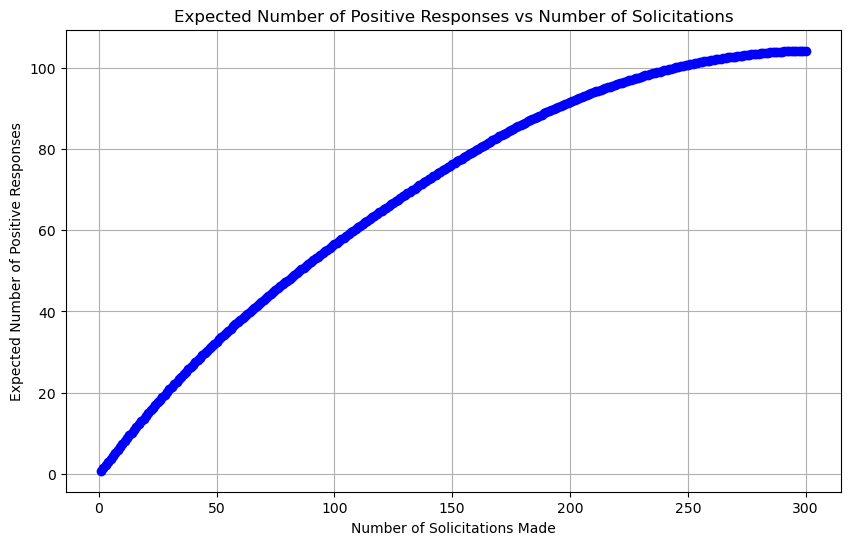

In [11]:
sorted_holdout['cumulative_responses'] = sorted_holdout['predicted_response_prob'].cumsum()


plt.figure(figsize=(10, 6))
plt.plot(sorted_holdout['rank'], sorted_holdout['cumulative_responses'], marker='o', linestyle='-', color='b')
plt.title('Expected Number of Positive Responses vs Number of Solicitations')
plt.xlabel('Number of Solicitations Made')
plt.ylabel('Expected Number of Positive Responses')
plt.grid(True)
plt.show()

In [12]:
sorted_holdout['predicted_response_prob']

0      0.750384
1      0.743278
2      0.739021
3      0.736668
4      0.730938
         ...   
295    0.016224
296    0.011335
297    0.011060
298    0.010868
299    0.009051
Name: predicted_response_prob, Length: 300, dtype: float64

**7. Assume that the firm has enough raw Belgian chocolate to make only 40 boxes of the pralines offered as part of the introductory offer. Use the limited supply rule to calculate how many of the best prospects in the holdout list Melrose should send solicitations to. Hand-in: your calculations and final answer.**

In [13]:
contact_40 = sorted_holdout[sorted_holdout['cumulative_responses']<=40]
len(contact_40)

64

**8. To test how well the scoring model predicts actual performance, Melrose sent the solic- itation offer to all 300 persons on the holdout list. The actual response is available as the y variable in the holdout list data part of the spreadsheet. Compute the cumulative sum (aka running sum) for this y variable when the persons are sorted as in Question 3. The cumulative sum of y at rank n gives the total actual number of conversions or positive responses when the firm contacted the n customers with the highest r. Plot this cumulative sum vs the number of solicitations made. Superimpose on this the curve obtained in step 6 above to get a chart akin to slide 44 . Based on this chart, comment on the discrepancies between the actual responses and the predicted response probabilities for the prospects. Comment also on the consequent impact on the decision made in step 7 above. Hand-in: the chart and your comments.**

In [14]:
sorted_holdout['cumulative_actual_responses'] = sorted_holdout['y'].cumsum()

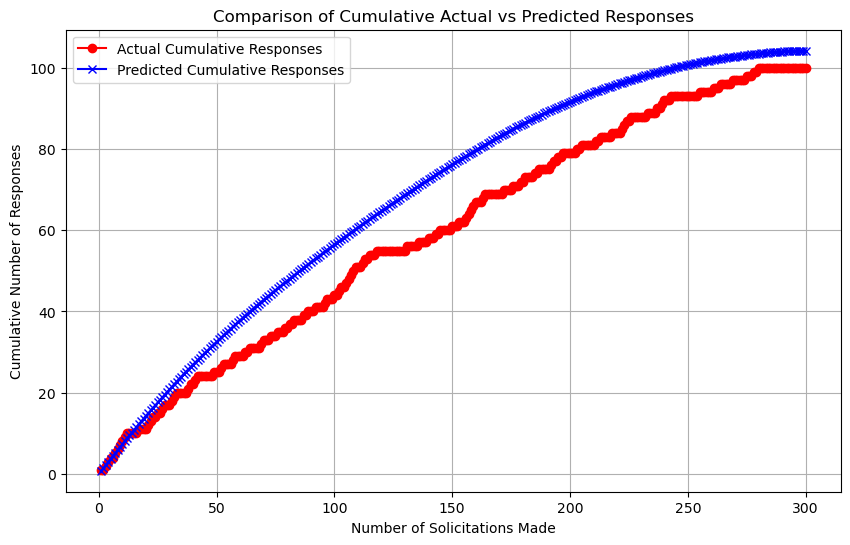

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(sorted_holdout['rank'], sorted_holdout['cumulative_actual_responses'], label='Actual Cumulative Responses', marker='o', color='r')
plt.plot(sorted_holdout['rank'], sorted_holdout['cumulative_responses'], label='Predicted Cumulative Responses', marker='x', color='b')
plt.title('Comparison of Cumulative Actual vs Predicted Responses')
plt.xlabel('Number of Solicitations Made')
plt.ylabel('Cumulative Number of Responses')
plt.grid(True)
plt.legend()
plt.show()

**Question 9: Consequences of 80-20: Prove that if the Pareto 80-20 phenomenon holds then the average lift in the top 20% of the prospects will be 4. A good starting point is to consider the situation where you have  P prospects and C conversions. (The proof is only 1-2 lines. So if you find yourself thinking about something more complicated then I suggest you stop and return to it after some time. The proof is quite simple and so my expectation is that more than 75 percent of the students will be able to do it.)**

Conversion_top_20 = 0.8 * C

Prospect_top_20 = 0.2 * P

Average_conversion_rate = C / P

Average_conversion_top_20 = (0.8 * C) / (0.2 * P)

Lift_top_20 = Average_conversion_top_20 / Average_conversion_rate
		= ((0.8 * C) / (0.2 * P))/ (C / P)
		= 4